# **Obtención de la Tabla de Salida**
La "Tabla de Salida" es el dataset final con los datos limpios, comprendiendo sólo las columnas relevantes y las variables numéricas escaladas.
A continuación detallamos el procedimiento para obtenerla.

In [21]:
#Importación de las librerías necesarias
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [22]:
#Obtención de dataframe a partir de la tabla origen.
#Ésta debe descargarse del repositorio de GitHub o del link de
#Google Drive https://drive.google.com/file/d/1owU5YhizDMaotWrwNXFaZ8SbzNtLdbjt/view?usp=drive_link
df = pd.read_csv ('/content/Tabla_Origen.csv',sep=',',error_bad_lines=False)

#Tansformación de la tabla origen: manejo de valores nulos y conversión de la variable
#duración de milisegundos a segundos
df = df.fillna(0)  # Manejo de valores nulos
df = df.dropna()  # Manejo de valores nulos
df['duration_ms'] = df['duration_ms'] / 1000  # Convertsión duración a segundos

<ipython-input-22-c434d8000897>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv ('/content/Tabla_Origen.csv',sep=',',error_bad_lines=False)
Skipping line 2318: expected 11 fields, saw 12
Skipping line 3202: expected 11 fields, saw 12
Skipping line 4992: expected 11 fields, saw 12
Skipping line 5403: expected 11 fields, saw 12
Skipping line 6298: expected 11 fields, saw 12
Skipping line 7062: expected 11 fields, saw 12
Skipping line 7207: expected 11 fields, saw 12
Skipping line 8165: expected 11 fields, saw 12
Skipping line 9260: expected 11 fields, saw 12
Skipping line 9839: expected 11 fields, saw 12
Skipping line 13342: expected 11 fields, saw 12
Skipping line 13726: expected 11 fields, saw 12
Skipping line 14702: expected 11 fields, saw 12
Skipping line 15827: expected 11 fields, saw 12
Skipping line 15956: expected 11 fields, saw 12
Skipping line 16418: expected 11 fiel

In [23]:
#Verificación del dataframe resultante
df

,playlist_name,playlist_pid,playlist_num_followers,album_name,album_uri,artist_name,artist_uri,duration_ms,pos,track_name,track_uri
0,Party,1000000,70,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,AronChupa,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,163.809,0.0,Little Swing,spotify:track:66U0ASk1VHZsqIkpMjKX3B
1,Party,1000000,70,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,AronChupa,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,166.848,1.0,I'm an Albatraoz,spotify:track:5MhsZlmKJG6X5kTHkdwC4B
2,Party,1000000,70,Yellow Flicker Beat,spotify:album:4UEPxQx0cTcYNsE0n32MHV,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,232.506,2.0,Yellow Flicker Beat - From The Hunger Games: M...,spotify:track:0GZoB8h0kqXn7XFm4Sj06k
3,Party,1000000,70,Pure Heroine,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,216.600,3.0,White Teeth Teens,spotify:track:35kahykNu00FPysz3C2euR
4,Party,1000000,70,Pure Heroine,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,193.058,4.0,Team,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1
...,...,...,...,...,...,...,...,...,...,...,...
280704,Playlist 2015,1006767,20,Salsa Classics Revisited,spotify:album:2QeEEn8jNy5SFx9coIzS3Z,El Gran Combo De Puerto Rico,spotify:artist:6nnspeopmJAG07xOxHmqTu,339.573,0.0,Y No Hago Mas Na' - Reggaeton Mix,spotify:track:38griAVM808crjbFp9gcPD
280705,Workout,1006771,24,Greatest Hits,spotify:album:3PO9OtQdvCDJN8zDLtZiYd,2Pac,spotify:artist:1ZwdS5xdxEREPySFridCfh,285.026,0.0,California Love - Original Version,spotify:track:1JClFT74TYSXlzpagbmj0S
280706,Girlz,1006773,16,Be You,spotify:album:5NjFyeZJkYAh5ri9eh8ZSO,Ashley DuBose,spotify:artist:2Y9lO01ABSO8OkBU8FI1mp,279.322,0.0,Intoxicated,spotify:track:4InLm5a9Qtkru6YxEjM4Qc
280707,let's get lost,1006775,35,Deadroses,spotify:album:1TkwzY3l4LqAfrQwBAx45Q,blackbear,spotify:artist:2cFrymmkijnjDg9SS92EPM,223.295,0.0,90210 (feat. G-Eazy),spotify:track:4hdog9vyyqG9pcppG2Izek


In [24]:
#Exportar el dataframe obtenido como tabla en formato CSV llamada Dataset_Tabla_de_Salida
df.to_csv('/content/Dataset_Tabla_de_Salida.csv', index=False)

# Acercamiento a modelo KNN
A continuación un acercamiento previo al modelo de KNN que se desarrollará y mejorará más adelante con las herramientas que se aprendan en el curso de Big Data.

In [25]:
# Selección de campos numéricos
numeric_fields = ['playlist_num_followers', 'duration_ms', 'pos']

# Cálculo de la matriz de correlación
correlation_matrix = df[numeric_fields].corr()

print(correlation_matrix)


                        playlist_num_followers  duration_ms       pos
playlist_num_followers                1.000000     0.009634  0.165045
duration_ms                           0.009634     1.000000 -0.013660
pos                                   0.165045    -0.013660  1.000000


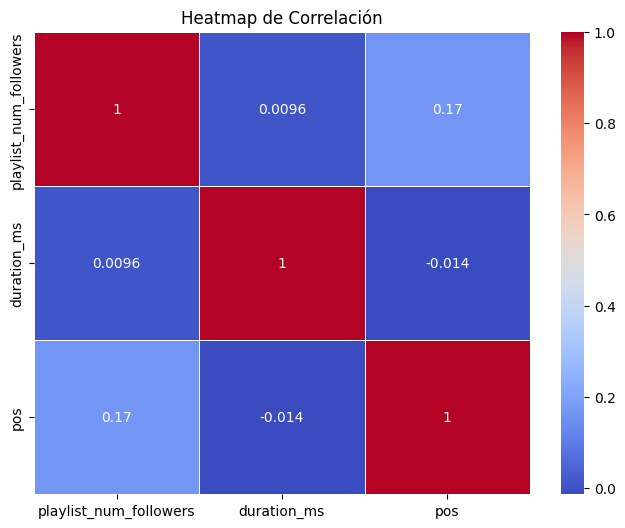

In [26]:
#Gráfico de matriz de correlación entre variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()


In [27]:
#Importación de librerías para previo modelo de KNN
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder


#Ejemplo de datos de interacciones de playlist de usuarios con pistas
user_playlist_interactions = df

user_playlist_interactions['playlist_name'] = user_playlist_interactions['playlist_name'].astype(str)
user_playlist_interactions['track_name'] = user_playlist_interactions['track_name'].astype(str)

#Tratamiendo de variables Categóricas
# Codificación de etiquetas para pistas y playlist de usuarios
label_encoder = LabelEncoder()
user_playlist_interactions['playlist_name'] = label_encoder.fit_transform(user_playlist_interactions['playlist_name'])
user_playlist_interactions['track_name'] = label_encoder.fit_transform(user_playlist_interactions['track_name'])

# Creación de una matriz de preferencias de usuarios utilizando pivot_table
user_track_preferences = user_playlist_interactions.pivot_table(index='playlist_name', columns='track_name', values='playlist_num_followers', aggfunc='mean').fillna(0)

# Cálculo de la similitud de coseno entre pistas basado en preferencias de usuarios
track_similarity = cosine_similarity(user_track_preferences)

# Crear un modelo de recomendación basado en la similitud de coseno
model = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute', leaf_size=30, n_jobs=-1)
model.fit(track_similarity)

# Ejemplo de recomendación para una pista de referencia
reference_track = 10  # Cambiar esto al índice de la pista de referencia
distances, indices = model.kneighbors(track_similarity[reference_track].reshape(1, -1), n_neighbors=5)

# Recomendación de pistas similares
recommended_tracks = user_playlist_interactions.iloc[indices[0]]['track_name'].tolist()

print("Pistas recomendadas para la pista de referencia:", recommended_tracks)


Pistas recomendadas para la pista de referencia: [4624, 34791, 53710, 1857, 36509]


In [28]:
#Verificación dataframe obtenido
user_track_preferences

track_name,0,1,2,3,4,5,6,7,8,9,...,53908,53909,53910,53911,53912,53913,53914,53915,53916,53917
playlist_name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
